In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [77]:
from matplotlib import rc,font_manager
#한글폰트 적용
path='../font/MaplestoryBold.ttf'
font_name=font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus']=False

In [106]:
data=pd.read_csv('data/업종별성별카드이용정보.csv')
# display(data)

d1=data
d1['년도']=d1['연월'].astype('str').str[0:4]

# display(d1)

d2=d1.groupby(['년도','업종명']).sum()

d3=d1.groupby(['년도','업종명','성별']).sum()
display(d3)

d4=d3.reset_index(level='년도')
# display(d4)

d4.reset_index(inplace=True)

d5=d4.pivot(['업종명','성별'],'년도',['이용자수','이용건수','이용금액'])
d5=d5.swaplevel(axis=1)
d5=d5.sort_values(axis=1,by='년도')
d5.to_csv('성별별년도별이용뭐시깽이.csv',encoding='utf-8')

연월    이용자수    이용건수         이용금액
년도   업종명           성별                                         
2018 건강보조식품 소매업    남성     4843356    7967    8252   1322367535
                   알수없음  13722847    6235    6807   4849671268
                   여성     4843356    9710   10136   1453000377
     골프장 운영업       남성     4843356  162520  173213  23517462995
                   알수없음  11502984  104099  112315  26493479830
...                           ...     ...     ...          ...
2021 화장품 및 방향제 소매업 알수없음   5052629    5377    5937    859495448
                   여성     3637890   48867   53468   2859143370
     휴양콘도 운영업      남성     3637890   59399   69067   8565281327
                   알수없음   4850516   20529   39861  16414754240
                   여성     3637890   48253   56095   5948158795

[486 rows x 4 columns]

In [53]:
d1['업종명'].unique()

array(['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업',
       '그외 기타 분류안된 오락관련 서비스업', '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업',
       '기타 갬블링 및 베팅업', '기타 대형 종합 소매업', '기타 수상오락 서비스업', '기타 외국식 음식점업',
       '기타 주점업', '기타음식료품위주종합소매업', '내항 여객 운송업', '마사지업', '면세점', '버스 운송업',
       '비알콜 음료점업', '빵 및 과자류 소매업', '서양식 음식점업', '수산물 소매업', '슈퍼마켓',
       '스포츠 및 레크레이션 용품 임대업', '여관업', '여행사업', '욕탕업', '육류 소매업', '일반유흥 주점업',
       '일식 음식점업', '자동차 임대업', '전시 및 행사 대행업', '정기 항공 운송업', '중식 음식점업',
       '차량용 가스 충전업', '차량용 주유소 운영업', '체인화 편의점', '피자, 햄버거, 샌드위치 및 유사 음식점업',
       '한식 음식점업', '호텔업', '화장품 및 방향제 소매업', '휴양콘도 운영업', '택시 운송업'],
      dtype=object)

In [25]:
d2.reset_index(inplace=True)
display(d2)

test=d2.pivot('업종명','년도',['이용자수','이용건수','이용금액'])
display(test)

test2=test.swaplevel(axis=1)
test2=test2.sort_values(axis=1,by='년도')
display(test2)

test2.to_csv('년도별이용뭐시깽이.csv',encoding='utf-8')

,년도,업종명,연월,이용자수,이용건수,이용금액
0,2018,건강보조식품 소매업,23409559,23912,25195,7625039180
1,2018,골프장 운영업,21189696,318697,341477,57270700475
2,2018,과실 및 채소 소매업,20987913,447501,490809,39800732645
3,2018,관광 민예품 및 선물용품 소매업,23611368,277348,303304,11311543050
4,2018,그외 기타 분류안된 오락관련 서비스업,12108380,1121,1213,59579143
...,...,...,...,...,...,...
160,2021,"피자, 햄버거, 샌드위치 및 유사 음식점업",15157880,998949,1082332,14451141181
161,2021,한식 음식점업,16370505,6577338,7041672,274034104424
162,2021,호텔업,15359984,139296,165710,36788975868
163,2021,화장품 및 방향제 소매업,12328409,78176,85648,5244391078


이용자수                                     \
년도                             2018        2019        2020       2021   
업종명                                                                      
건강보조식품 소매업                  23912.0     26243.0     20579.0    12660.0   
골프장 운영업                    318697.0    339126.0    360572.0   281876.0   
과실 및 채소 소매업                447501.0    503137.0    442168.0   393125.0   
관광 민예품 및 선물용품 소매업          277348.0    290537.0    217651.0   247451.0   
그외 기타 분류안된 오락관련 서비스업         1121.0      3277.0      2859.0     1096.0   
그외 기타 스포츠시설 운영업              9728.0     13810.0      6884.0     6710.0   
그외 기타 종합 소매업               536209.0    543161.0    542444.0   360683.0   
기타 갬블링 및 베팅업                  284.0       266.0        72.0       14.0   
기타 대형 종합 소매업              1492548.0   1429503.0   1142475.0   777305.0   
기타 수상오락 서비스업                  801.0      1070.0      3191.0     1635.0   
기타 외국식 음식점업                288275.0    284170.0    241183.0   153239.0   
기타 주점업                     108325.0     99423.0     77008.0    21617.0   
기타음식료품위주종합소매업             1185800.0   1287501.0   1461089.0  1083746.0   
내항 여객 운송업                  111415.0    119887.0     93677.0    87388.0   
마사지업                         1517.0      1919.0      1878.0     1573.0   
면세점                       1109168.0   1065825.0    769648.0   606546.0   
버스 운송업                         28.0         NaN         NaN        NaN   
비알콜 음료점업                  1469050.0   1598217.0   1692984.0  1251509.0   
빵 및 과자류 소매업               1542956.0   1570014.0   1337826.0  1034947.0   
서양식 음식점업                  1798786.0   2097137.0   2001402.0  1739579.0   
수산물 소매업                    333649.0    362542.0    322925.0   273703.0   
슈퍼마켓                      5758638.0   5704986.0   5905590.0  4067285.0   
스포츠 및 레크레이션 용품 임대업         398410.0    381387.0    368106.0   249010.0   
여관업                        484047.0    468167.0    348335.0   283501.0   
여행사업                        38281.0     51909.0     30605.0    31892.0   
욕탕업                        142753.0    160398.0    124790.0    49338.0   
육류 소매업                     316535.0    322507.0    342944.0   245179.0   
일반유흥 주점업                   204285.0    191559.0    132429.0    34083.0   
일식 음식점업                    583215.0    599283.0    500734.0   378816.0   
자동차 임대업                    232299.0    251594.0    225444.0   182072.0   
전시 및 행사 대행업                464093.0    496419.0    294729.0   270069.0   
정기 항공 운송업                  372251.0    368649.0    243213.0   248899.0   
중식 음식점업                    578258.0    654250.0    676148.0   512336.0   
차량용 가스 충전업                 181011.0    185709.0    170660.0   122739.0   
차량용 주유소 운영업               3262720.0   3132052.0   2846554.0  2199130.0   
체인화 편의점                  10901727.0  11663645.0  11428851.0  8357222.0   
택시 운송업                         12.0       267.0      1636.0      271.0   
피자, 햄버거, 샌드위치 및 유사 음식점업   1356308.0   1387646.0   1331491.0   998949.0   
한식 음식점업                   9981842.0  10345776.0   8976016.0  6577338.0   
호텔업                        183000.0    190980.0    139892.0   139296.0   
화장품 및 방향제 소매업              250603.0    208341.0    139963.0    78176.0   
휴양콘도 운영업                   194707.0    218100.0    149806.0   128181.0   

                               이용건수                                     \
년도                             2018        2019        2020       2021   
업종명                                                                      
건강보조식품 소매업                  25195.0     27859.0     21963.0    13277.0   
골프장 운영업                    341477.0    364052.0    386157.0   303952.0   
과실 및 채소 소매업                490809.0    553934.0    487084.0   433585.0   
관광 민예품 및 선물용품 소매업          303304.0    317035.0    236024.0   269750.0   
그외 기타 분류안된 오락관련 서비스업         1213.0      3487.0      3020.0     1161.0   
그외 기타 스포츠시설 운영업             10775.0     16678.0      7529.0     7366.0   
그외 기타 종합 소매업               644057.

년도                             2018                                  2019  \
                               이용자수        이용건수          이용금액        이용자수   
업종명                                                                         
건강보조식품 소매업                  23912.0     25195.0  7.625039e+09     26243.0   
골프장 운영업                    318697.0    341477.0  5.727070e+10    339126.0   
과실 및 채소 소매업                447501.0    490809.0  3.980073e+10    503137.0   
관광 민예품 및 선물용품 소매업          277348.0    303304.0  1.131154e+10    290537.0   
그외 기타 분류안된 오락관련 서비스업         1121.0      1213.0  5.957914e+07      3277.0   
그외 기타 스포츠시설 운영업              9728.0     10775.0  8.438858e+08     13810.0   
그외 기타 종합 소매업               536209.0    644057.0  4.894484e+10    543161.0   
기타 갬블링 및 베팅업                  284.0       339.0  1.588680e+09       266.0   
기타 대형 종합 소매업              1492548.0   1735408.0  9.089673e+10   1429503.0   
기타 수상오락 서비스업                  801.0       825.0  1.412514e+08      1070.0   
기타 외국식 음식점업                288275.0    301157.0  1.098364e+10    284170.0   
기타 주점업                     108325.0    116273.0  2.266689e+10     99423.0   
기타음식료품위주종합소매업             1185800.0   1360911.0  5.535503e+10   1287501.0   
내항 여객 운송업                  111415.0    115873.0  3.837262e+09    119887.0   
마사지업                         1517.0      1621.0  1.896880e+08      1919.0   
면세점                       1109168.0   1685104.0  1.200460e+11   1065825.0   
버스 운송업                         28.0        38.0  5.507900e+07         NaN   
비알콜 음료점업                  1469050.0   1601444.0  1.663144e+10   1598217.0   
빵 및 과자류 소매업               1542956.0   1657340.0  2.487865e+10   1570014.0   
서양식 음식점업                  1798786.0   1960671.0  4.738998e+10   2097137.0   
수산물 소매업                    333649.0    369399.0  3.229288e+10    362542.0   
슈퍼마켓                      5758638.0   6860882.0  1.946380e+11   5704986.0   
스포츠 및 레크레이션 용품 임대업         398410.0    436497.0  4.809543e+10    381387.0   
여관업                        484047.0    549331.0  6.123640e+10    468167.0   
여행사업                        38281.0     40038.0  7.952012e+09     51909.0   
욕탕업                        142753.0    154131.0  3.318342e+09    160398.0   
육류 소매업                     316535.0    340677.0  2.686700e+10    322507.0   
일반유흥 주점업                   204285.0    225497.0  4.866708e+10    191559.0   
일식 음식점업                    583215.0    597032.0  4.528640e+10    599283.0   
자동차 임대업                    232299.0    235685.0  1.849873e+10    251594.0   
전시 및 행사 대행업                464093.0    530455.0  2.071396e+10    496419.0   
정기 항공 운송업                  372251.0    374200.0  6.328087e+10    368649.0   
중식 음식점업                    578258.0    606536.0  1.828922e+10    654250.0   
차량용 가스 충전업                 181011.0    188477.0  1.172292e+10    185709.0   
차량용 주유소 운영업               3262720.0   3439885.0  1.963558e+11   3132052.0   
체인화 편의점                  10901727.0  12528510.0  1.029589e+11  11663645.0   
택시 운송업                         12.0        12.0  6.120000e+05       267.0   
피자, 햄버거, 샌드위치 및 유사 음식점업   1356308.0   1460737.0  1.953543e+10   1387646.0   
한식 음식점업                   9981842.0  10650738.0  4.593315e+11  10345776.0   
호텔업                        183000.0    210569.0  6.632375e+10    190980.0   
화장품 및 방향제 소매업              250603.0    274606.0  1.322733e+10    208341.0   
휴양콘도 운영업                   194707.0    232396.0  2.628445e+10    218100.0   

년도                                                       2020              \
                               이용건수          이용금액        이용자수        이용건수   
업종명                                                                         
건강보조식품 소매업                  27859.0  1.320521e+10     20579.0     21963.0   
골프장 운영업                    364052.0  6.027266e+10    360572.0    386157.0   
과실 및 채소 소매업                553934.0  4.006130e+10    442168.0    487084.0   
관광 민예품 및 선물용품 소매업          317035.0  1.282761e+10    217651.0    236024.

In [212]:
#그래프화
data=pd.read_csv('성별별년도별이용뭐시깽이.csv',index_col=[0,1],header=[0,1])
display(data)

test=d3.reset_index()

m_test=test[test['성별']=='남성']
w_test=test[test['성별']=='여성']

m_test=m_test[m_test['업종명']!='버스 운송업']
w_test=w_test[w_test['업종명']!='버스 운송업']

t1=m_test[m_test['년도']=='2018'].업종명
t2=w_test[w_test['년도']=='2018'].업종명

C:\Users\JY_Kim\AppData\Local\Temp\ipykernel_12144\728483383.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot1.set_xticklabels(['0','1백만','2백만','3백만','4백만','5백만','6백만','7백만','8백만'])
C:\Users\JY_Kim\AppData\Local\Temp\ipykernel_12144\728483383.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot2.set_xticklabels(['0','1백만','2백만','3백만','4백만','5백만','6백만','7백만','8백만'])
C:\Users\JY_Kim\AppData\Local\Temp\ipykernel_12144\728483383.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot1.set_xticklabels(['0','500억','1000억','1500억','2000억','2500억'])
C:\Users\JY_Kim\AppData\Local\Temp\ipykernel_12144\728483383.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot2.set_xticklabels(['0','500억','1000억','1500억','2000억','2500억'])
C:\Users\JY_Kim\AppData\Local\Temp\ipykernel_12144\728483383.py:12: UserWarning: FixedFormatter should only be use

<Figure size 1080x720 with 0 Axes>

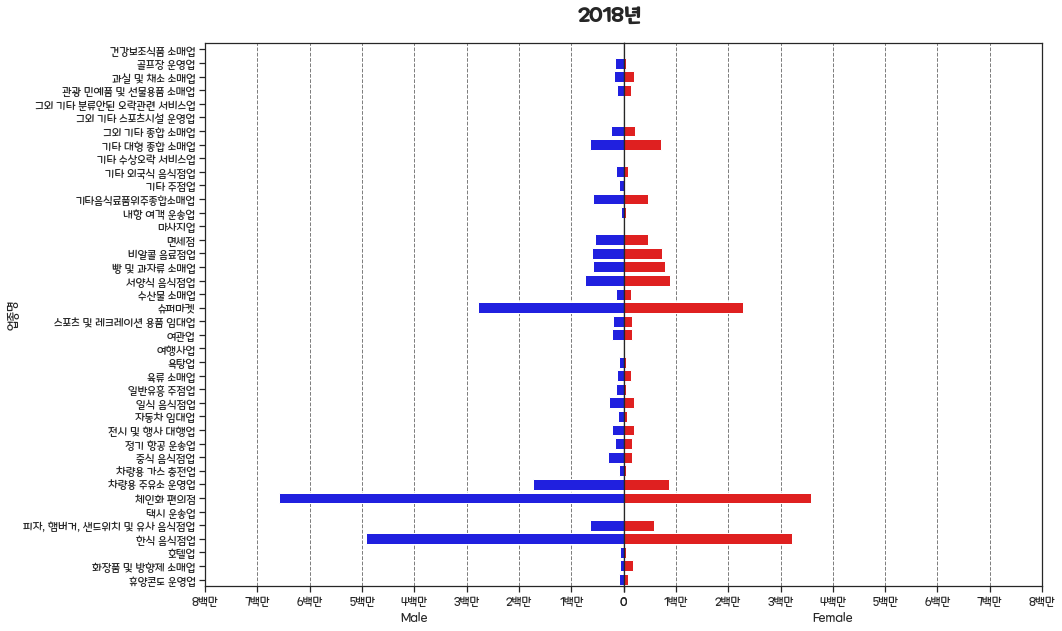

<Figure size 1080x720 with 0 Axes>

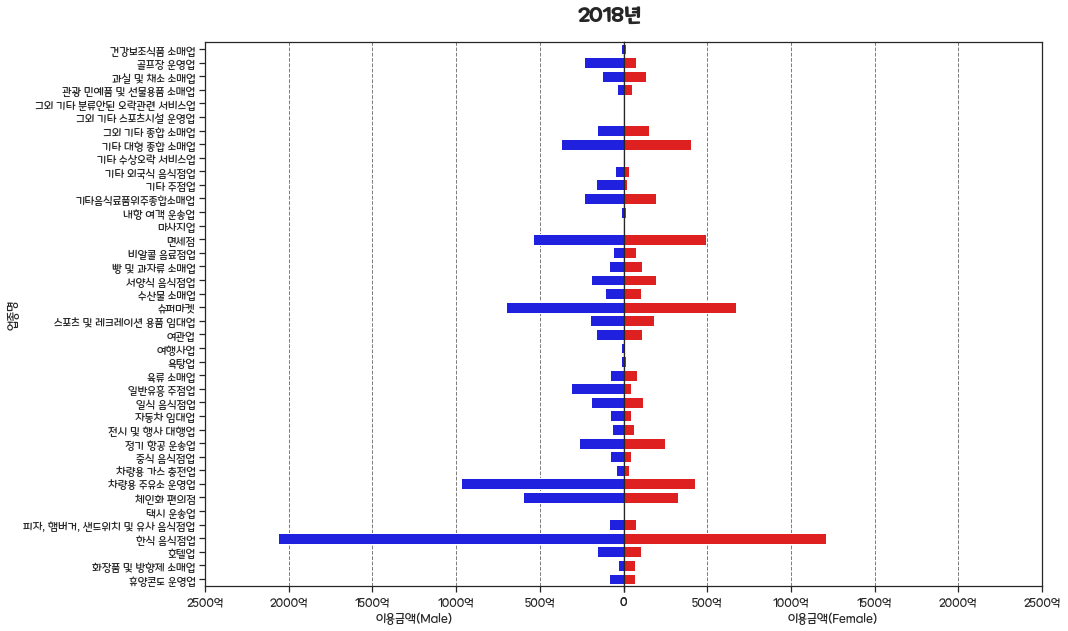

<Figure size 1080x720 with 0 Axes>

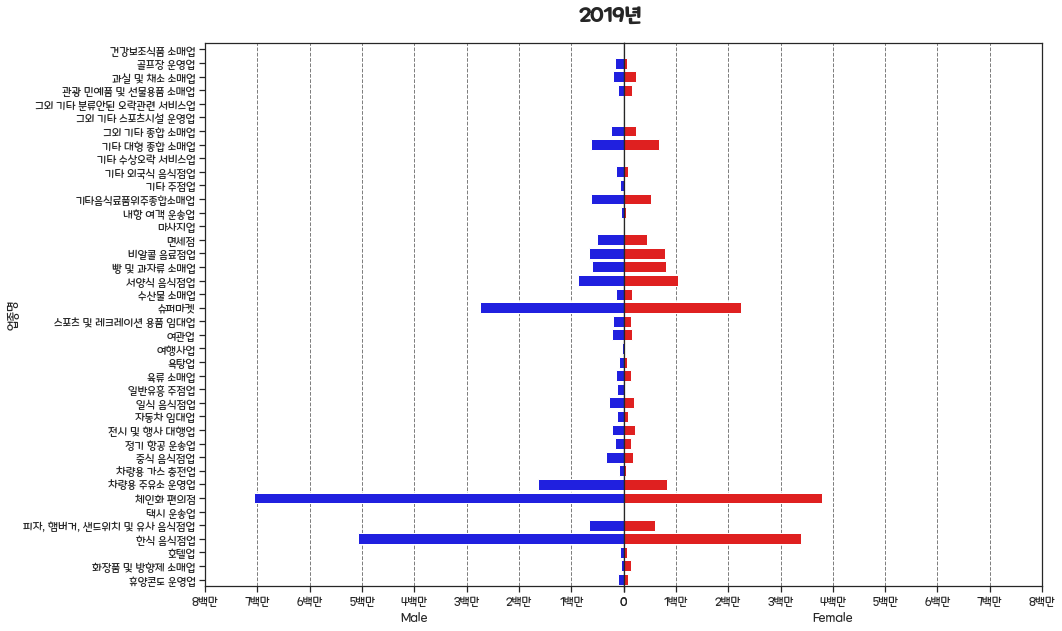

<Figure size 1080x720 with 0 Axes>

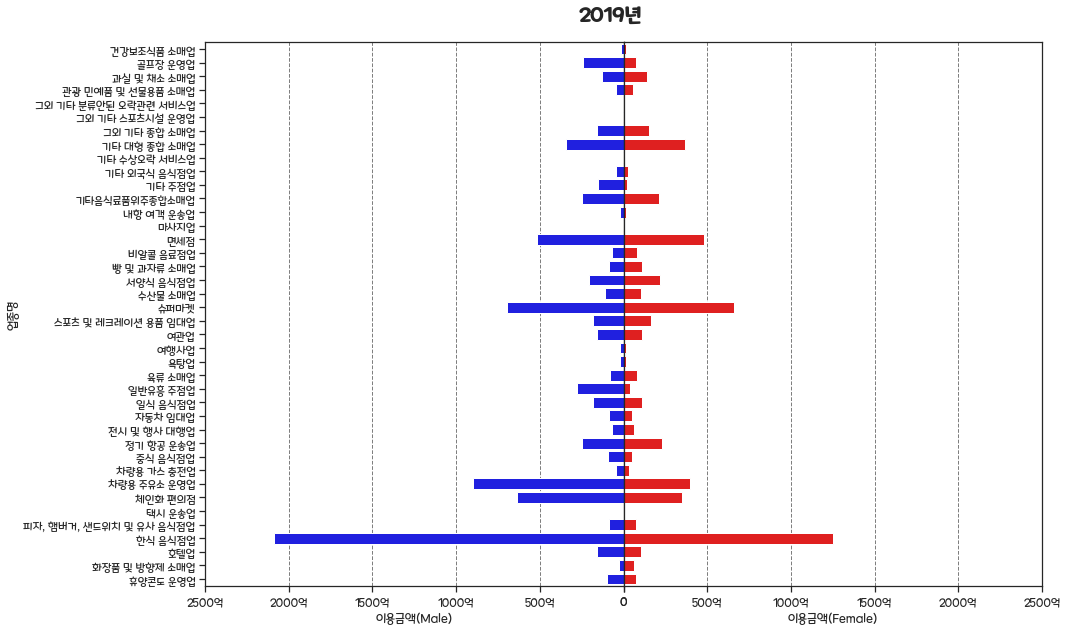

<Figure size 1080x720 with 0 Axes>

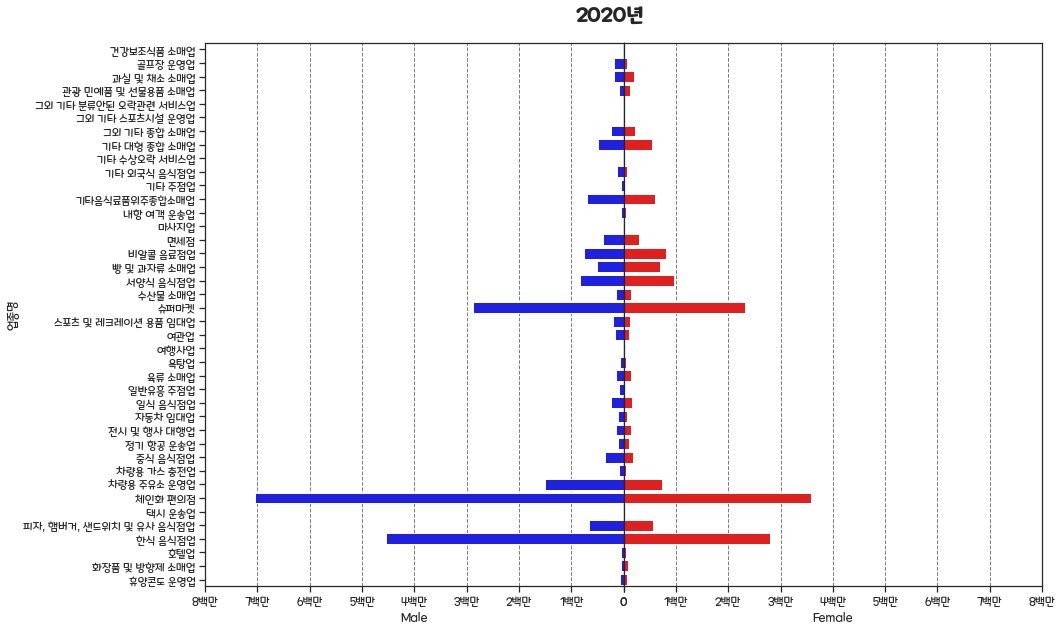

<Figure size 1080x720 with 0 Axes>

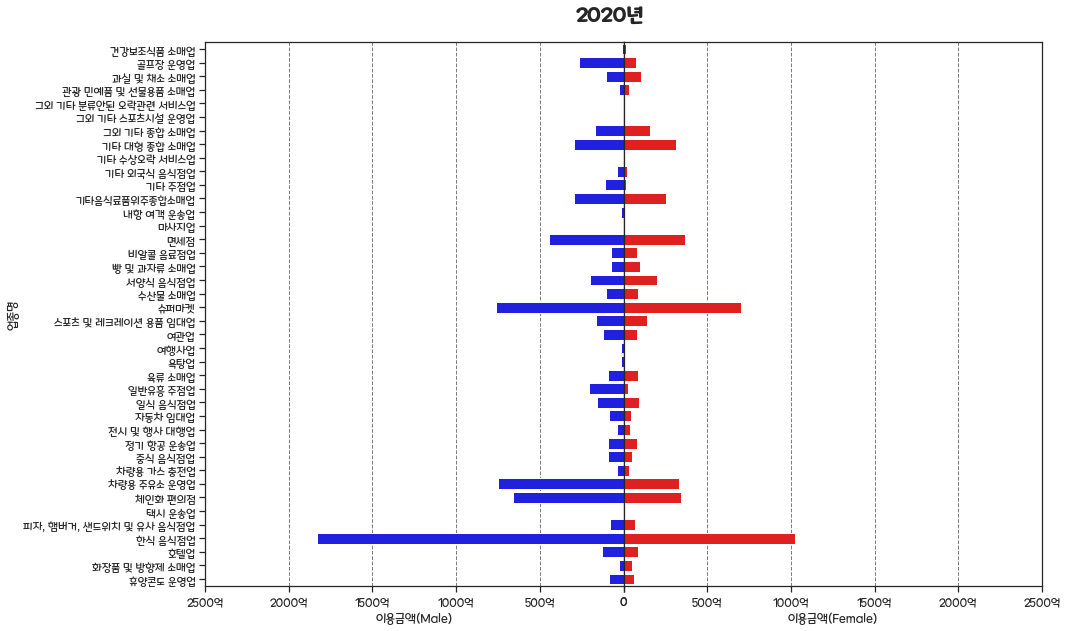

<Figure size 1080x720 with 0 Axes>

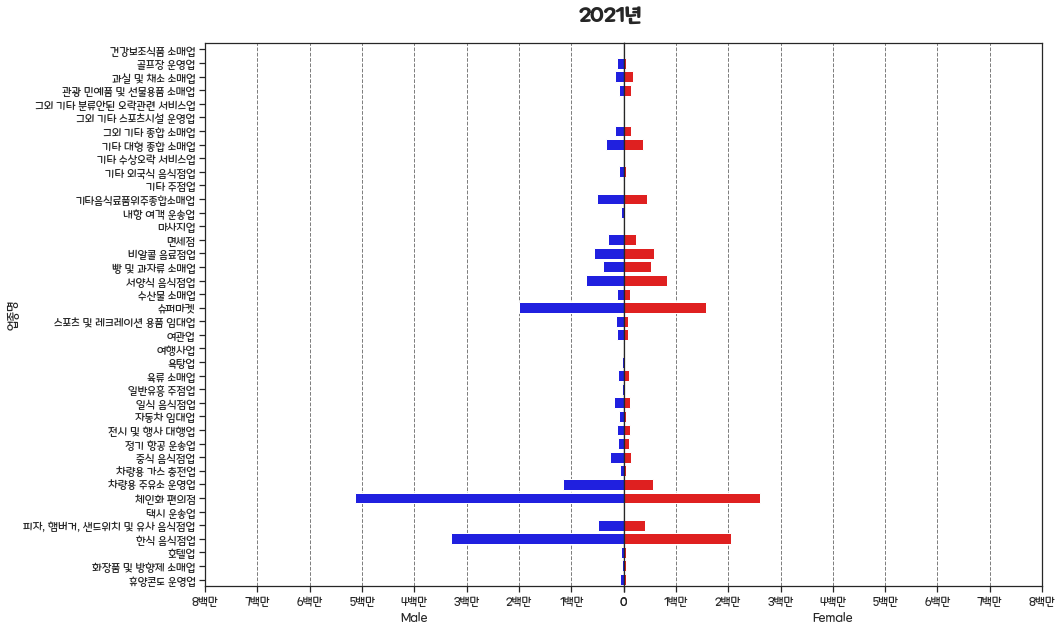

<Figure size 1080x720 with 0 Axes>

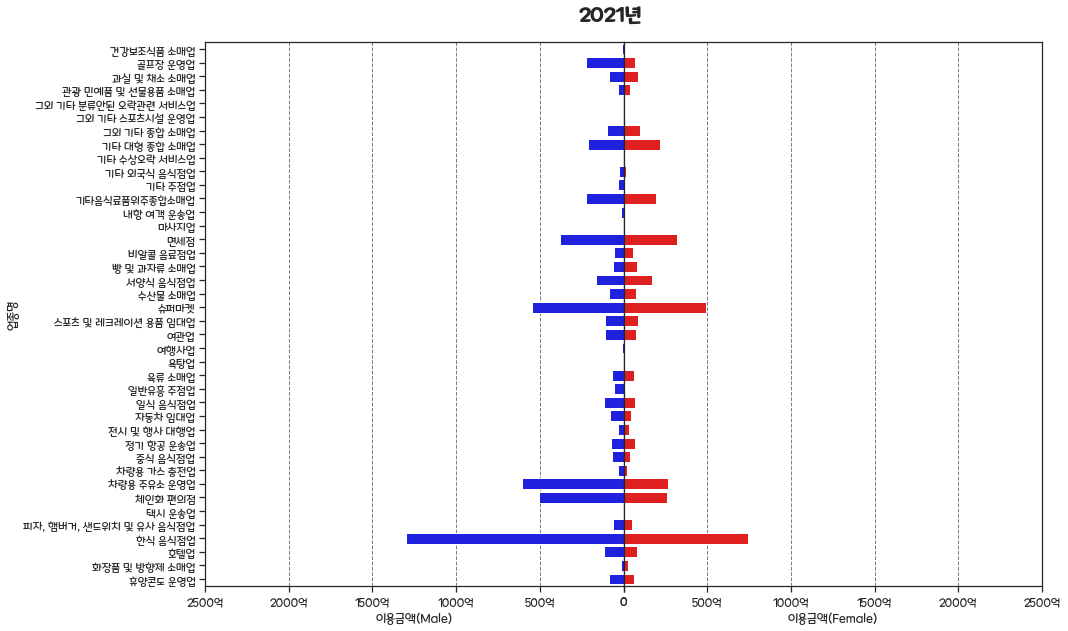

In [293]:
for a in range(2018,2022):
    a=str(a)
    plt.figure(figsize=(15,10))
    title=a+"년"
    fig,axs=plt.subplots(ncols=2,sharey=True,figsize=(15,10),gridspec_kw={'wspace':0})
    plt.suptitle(title,fontweight='bold',fontsize=20,y=0.93)
    bar_plot1=sns.barplot(x='이용자수',y='업종명',data=m_test[m_test['년도']==a],ax=axs[0],color='blue')
    bar_plot2=sns.barplot(x='이용자수',y='업종명',data=w_test[w_test['년도']==a],ax=axs[1],color='red')
    xmax=8e6
    axs[0].set_xlim(xmax,0)
    axs[1].set_xlim(0,xmax)
    bar_plot1.set_xticklabels(['0','1백만','2백만','3백만','4백만','5백만','6백만','7백만','8백만'])
    bar_plot2.set_xticklabels(['0','1백만','2백만','3백만','4백만','5백만','6백만','7백만','8백만'])
    axs[0].grid(True,color='black',alpha=0.5,axis='x',linestyle='--')
    axs[1].grid(True,color='black',alpha=0.5,axis='x',linestyle='--')
    bar_plot1.set(xlabel="Male",)
    bar_plot2.set(xlabel="Female", ylabel='')
    bar_plot2.tick_params(left=False)
    file1='graph/업종별이용자수'+a+'.png'
    plt.savefig(file1,bbox_inches='tight')

    plt.figure(figsize=(15,10))
    fig,axs=plt.subplots(ncols=2,sharey=True,figsize=(15,10),gridspec_kw={'wspace':0})
    plt.suptitle(title,fontweight='bold',fontsize=20,y=0.93)
    bar_plot1=sns.barplot(x='이용금액',y='업종명',data=m_test[m_test['년도']==a],ax=axs[0],color='blue')
    bar_plot2=sns.barplot(x='이용금액',y='업종명',data=w_test[w_test['년도']==a],ax=axs[1],color='red')
    xmax=25e10
    axs[0].set_xlim(xmax,0)
    axs[1].set_xlim(0,xmax)
    bar_plot1.set(xlabel="이용금액(Male)",)
    bar_plot1.set_xticklabels(['0','500억','1000억','1500억','2000억','2500억'])
    bar_plot2.set_xticklabels(['0','500억','1000억','1500억','2000억','2500억'])
    axs[0].grid(True,color='black',alpha=0.5,axis='x',linestyle='--')
    axs[1].grid(True,color='black',alpha=0.5,axis='x',linestyle='--')
    bar_plot2.set(xlabel="이용금액(Female)", ylabel='')
    bar_plot2.tick_params(left=False)
    file2='graph/업종별이용금액'+a+'.png'
    plt.savefig(file2,bbox_inches='tight')